# Análise dos dados 
Temos que refazer os passos para estudar os dados e deixar nosso algoritmo mais certeiro

In [61]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns

dataset = pd.read_csv('db/movie_dataset.csv', sep=',',  index_col=0, na_values='?')

dataset = dataset.loc[:, ~dataset.columns.isin(['original_title', 'overview', 'tagline', 'title', 'homepage', 'crew', 'keywords', 'original_language', 'id'])]
dataset = dataset.loc[dataset['status'] == 'Released']
dataset = dataset.loc[dataset['revenue'] != 0]

Dataset base para manipulação dos dados

In [62]:
dataset_base = dataset.loc[:, dataset.columns.isin(['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count'])]
noise = np.random.randint(0, 101, size=dataset_base['revenue'].shape[0])
dataset_base['revenue'] = dataset_base['revenue'] + noise


/tmp/ipykernel_22670/3099180693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['revenue'] = dataset_base['revenue'] + noise


Separando as categorias de renda

In [63]:
dataset_base_rev_class = pd.qcut(dataset_base['revenue'], q=4)


Esse algoritmo calcula 4 intervalos com o mesmo número de filmes, de acordo com sua renda.
Esses intervalos são: 

    22.999, 15369299.0 <
    15369299.0, 51801256.0 < 
    51801256.0, 140168465.5 < 
    140168465.5, 2787965144.0


0, 1, 2, 3

very low, low, medium, high

In [64]:
dataset_base_rev_class = pd.qcut(dataset_base['revenue'], q=4, labels=['very low', 'low', 'medium', 'high'])
dataset_base['revenue'] = dataset_base_rev_class
dataset_base

/tmp/ipykernel_22670/2109934770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['revenue'] = dataset_base_rev_class


,budget,popularity,revenue,runtime,vote_average,vote_count
index,,,,,,
0,237000000,150.437577,high,162.0,7.2,11800
1,300000000,139.082615,high,169.0,6.9,4500
2,245000000,107.376788,high,148.0,6.3,4466
3,250000000,112.312950,high,165.0,7.6,9106
4,260000000,43.926995,high,132.0,6.1,2124
...,...,...,...,...,...,...
4775,0,0.362633,very low,85.0,6.3,8
4788,12000,4.553644,very low,93.0,6.2,110
4792,20000,0.212443,very low,111.0,7.4,63


Separando os dummies

In [65]:
dataset_dummies = dataset.loc[:, ~dataset.columns.isin(['budget', 'id', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count'])]
dataset_dummies = pd.get_dummies(dataset_dummies)

Separando os elementos para predição da renda

In [66]:
rev_pred_paramX = dataset_base.loc[:, dataset_base.columns != 'revenue'] 
rev_pred_paramY = np.array(dataset_base.loc[:, dataset_base.columns == 'revenue']).ravel()
rev_pred_paramY = pd.Series(rev_pred_paramY)

In [67]:
dataset_base.describe()

,budget,popularity,runtime,vote_average,vote_count
count,3.375000e+03,3375.000000,3375.000000,3375.000000,3375.00000
mean,3.889517e+07,28.268362,110.382519,6.309037,944.69837
std,4.420689e+07,35.624705,21.119197,0.882238,1392.96069
min,0.000000e+00,0.019984,0.000000,0.000000,0.00000
25%,8.500000e+06,9.967348,96.000000,5.800000,161.00000
50%,2.500000e+07,19.760383,106.000000,6.300000,441.00000
75%,5.200000e+07,36.428157,121.000000,6.900000,1091.50000
max,3.800000e+08,875.581305,338.000000,10.000000,13752.00000


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'vote_count'}>, <Axes: >]], dtype=object)

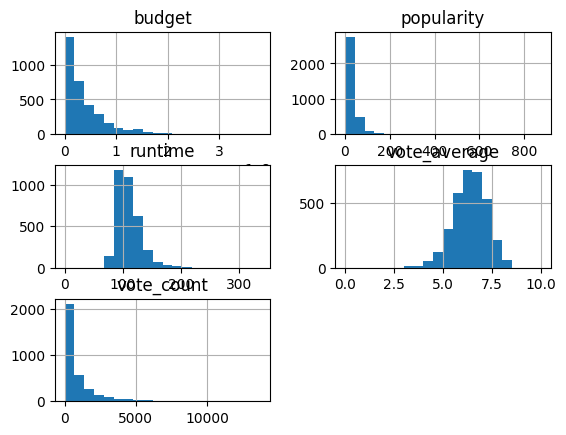

In [68]:
dataset_base[['revenue','budget', 'popularity', 'runtime', 'vote_average', 'vote_count']].hist(bins=20)

<Axes: xlabel='revenue', ylabel='count'>

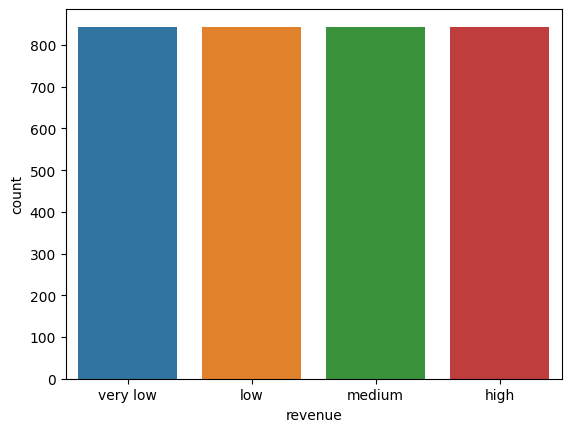

In [69]:
# calculate the counts of unique values in 'revenue'
value_counts = dataset_base['revenue'].value_counts()

# create a dataframe from value_counts
aux = pd.DataFrame(value_counts).reset_index()

# rename the columns
aux.columns = ['revenue', 'count']

# plot the bar plot
sns.barplot(x='revenue', y='count', data=aux)

/tmp/ipykernel_22670/892977906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_base['Revenue level'] = dataset_base['revenue'].replace({0 : 'very low', 1 : 'low', 2 : 'medium', 3 : 'high'})


<Axes: xlabel='budget', ylabel='Density'>

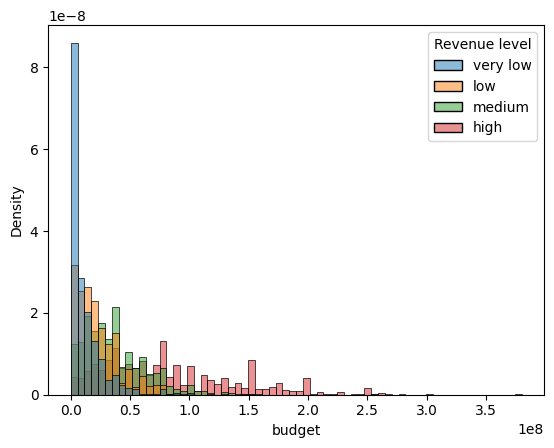

In [70]:
dataset_base['Revenue level'] = dataset_base['revenue'].replace({0 : 'very low', 1 : 'low', 2 : 'medium', 3 : 'high'})

sns.histplot(x='budget', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

<Axes: xlabel='vote_average', ylabel='Density'>

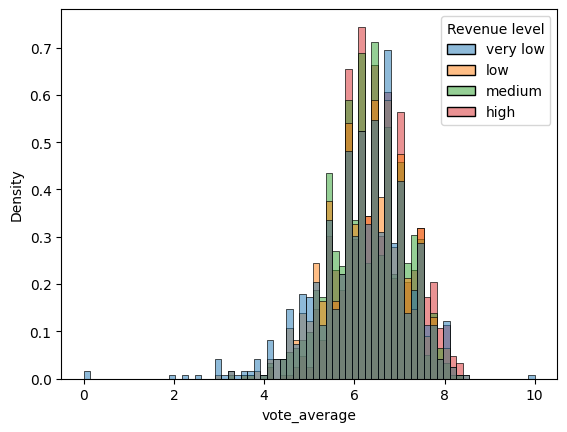

In [71]:
sns.histplot(x='vote_average', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

<Axes: xlabel='vote_count', ylabel='Density'>

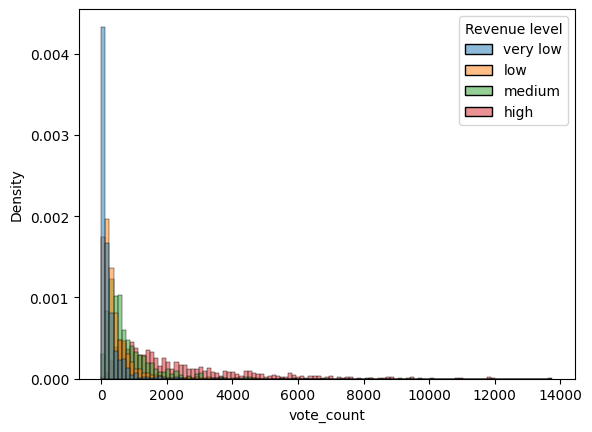

In [72]:
sns.histplot(x='vote_count', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

<Axes: xlabel='popularity', ylabel='Density'>

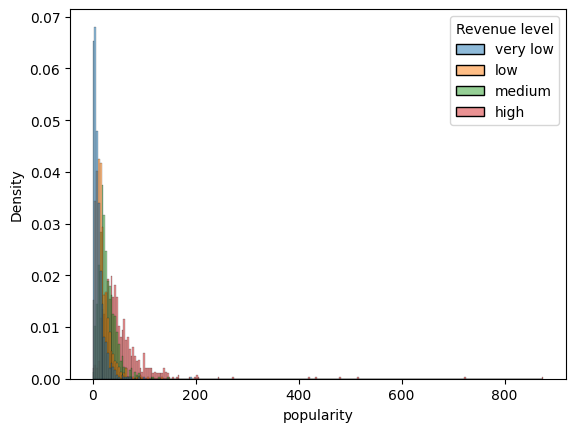

In [73]:
sns.histplot(x='popularity', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

<Axes: xlabel='runtime', ylabel='Density'>

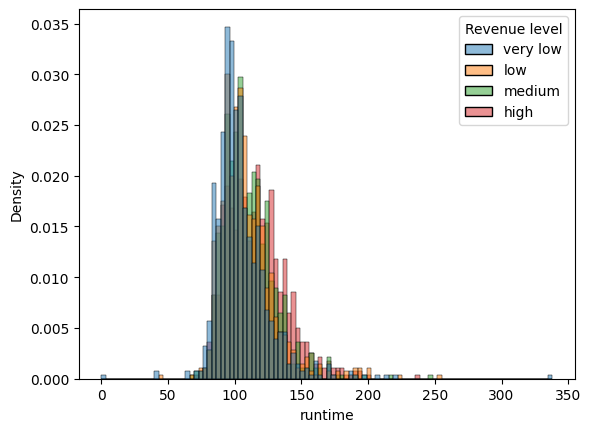

In [74]:
sns.histplot(x='runtime', hue='Revenue level', discrete=False,  stat='density', common_norm=False, 
             data=dataset_base)

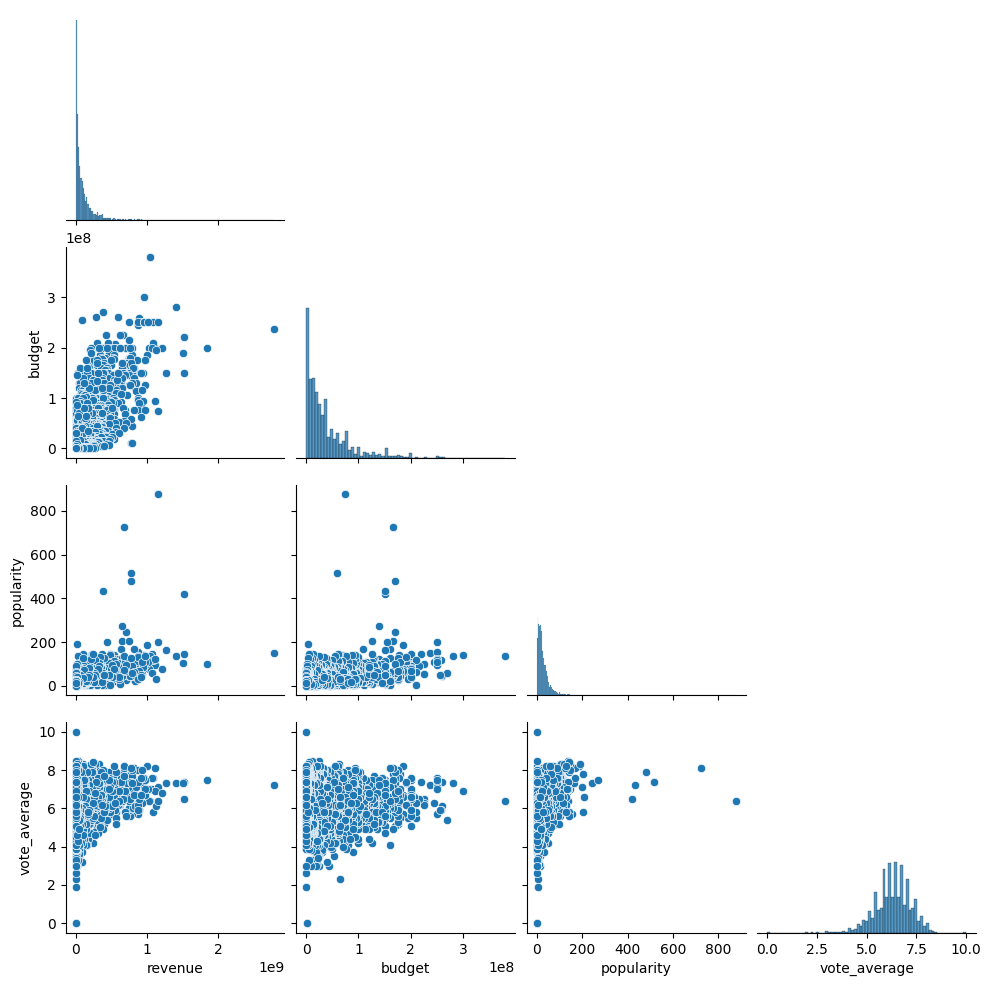

In [75]:
sns.pairplot(dataset[['revenue', 'budget', 'popularity', 'vote_average']], corner=True)

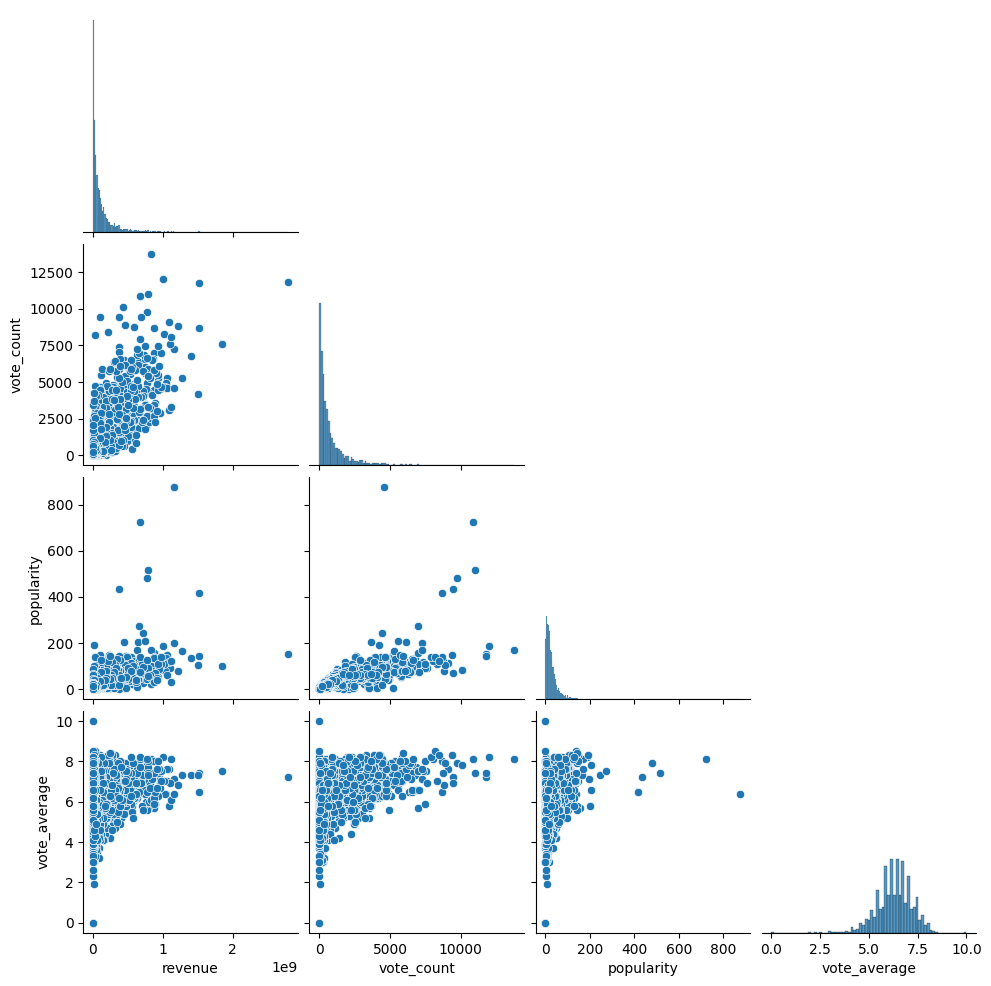

In [76]:
sns.pairplot(dataset[['revenue', 'vote_count', 'popularity', 'vote_average']], corner=True)